# Data Wrangling Project

### Gather

For this project, I first need to gather three pieces of data. <br> 1. WeRateDogs Twitter Archive (local csv file) <br> 2. Tweet image predictions (gathered programmatically through Requests) <br> 3. Tweet's retween count and favorite count at minimum, and any additional interesting data (gathered by querying the Twitter API for each tweet's JSON data using Python's Tweepy library and stored in a text file called tweet_json.txt)

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import os
from timeit import default_timer as timer
import matplotlib.pyplot as plt

In [2]:
wrd_df_original = pd.read_csv('twitter-archive-enhanced.csv')

#create copy of original dataframe
wrd_df_clean = wrd_df_original.copy()
wrd_df_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [3]:
folder_name = 'tweet_image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)

with open(os.path.join(folder_name,url.split('/')[-1]), mode='wb') as file:
    file.write(r.content)
    
tweet_images_df_original = pd.read_csv("tweet_image_predictions/image-predictions.tsv", sep="\t")
#create copy of original dataframe
tweet_images_df_clean = tweet_images_df_original.copy()
tweet_images_df_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [4]:
consumer_key = 'REMOVED'
consumer_secret = 'REMOVED'
access_token = 'REMOVED'
access_secret = 'REMOVED'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
#let's get the list of tweet IDs that will be used for our Twitter query
tweet_ids = wrd_df_clean.tweet_id.values
print(tweet_ids.shape[0], "tweet IDs")
print(tweet_ids)

2356 tweet IDs
[892420643555336193 892177421306343426 891815181378084864 ...
 666033412701032449 666029285002620928 666020888022790149]


In [6]:
count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success
551: 804738756058218496
Success


Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809: 771770456517009408
Success
810

Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
1064: 741067306818797568
Success
10

Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
1313: 707014260413456384
Success
1314: 706904523814649856
Success
13

Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
1563: 688211956440801280
Success
15

1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 6768

Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
20

Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
23

In [7]:
with open('tweet_json.txt') as file:
    data = []
    for line in file:
        data.append(json.loads(line))
        
#only need the ID, Retweet Count, and the Favorite Count
tweet_json_df_original = pd.DataFrame.from_dict(data)

#copy and filter the original dataframe
tweet_json_df_clean = tweet_json_df_original[['id', 'retweet_count', 'favorite_count']]
print(tweet_json_df_clean.shape)
tweet_json_df_clean.head()

(2333, 3)


id  retweet_count  favorite_count
0  892420643555336193           7860           36899
1  892177421306343426           5832           31756
2  891815181378084864           3854           23927
3  891689557279858688           8035           40213
4  891327558926688256           8683           38413

My 3 pieces of data have been gathered and now I can assess each one for quality and tidyness

### Assess and Clean

Quick summary: <br>
8 quality issues and 2 tidyness issues have been detected and fixed below.
<br>Quality issues: <br>
1. WRD missing data: Removing columns that contain mostly NULL values such as coordinates/place/contributors/etc. <br> 
2. WRD data: Convert tweet_id column from int64 to string<br>
3. WRD data: Timestamp column shows as string(object), convert to datetime format<br>
4. WRD data: Denominator column should all be based on a scale of 10, remove non-10 values<br>
5. WRD data: Numerator has values that are much much higher than 10, removing extremely high values<br>
6. Tweet Image Data: Convert tweet_id column from int64 to string<br>
7. Twitter API data: Convert ID column from int64 to string<br>
8. Twitter API data: Rename ID column to match the other 2 datasets ID name of 'tweet_id'<br>
<br>Tidiness issues: <br>
1. Dog stages will be melted to be represented properly<br>
2. Merge data into single dataset<br>
<br>

1. I will first look at the WeRateDogs data and I will check for null values in each column. I will find that some columns are mostly NULL values and do not provide me with valuable information that is usable in this project. I will delete these columns.

In [8]:
wrd_df_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [9]:
wrd_df_clean.drop('in_reply_to_status_id', axis=1, inplace=True)
wrd_df_clean.drop('in_reply_to_user_id', axis=1, inplace=True)
wrd_df_clean.drop('retweeted_status_id', axis=1, inplace=True)
wrd_df_clean.drop('retweeted_status_user_id', axis=1, inplace=True)
wrd_df_clean.drop('retweeted_status_timestamp', axis=1, inplace=True)

In [10]:
wrd_df_clean.isnull().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         59
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
dtype: int64

2. The next thing I will notice is that tweet_id is specified as int64 but is actually string, so I will convert the column to string.

In [11]:
wrd_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


In [12]:
wrd_df_clean['tweet_id'] = wrd_df_clean['tweet_id'].apply(str)

In [13]:
wrd_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(2), object(10)
memory usage: 221.0+ KB


3. I see that the column timestamp is shown as a string, so I will convert it to datetime format 

In [14]:
wrd_df_clean['timestamp'] = pd.to_datetime(wrd_df_clean['timestamp'])

In [15]:
wrd_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns, UTC]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 221.0+ KB


4. Looking at the denominator column, I see that not all values are equal to 10 (ratings are set on a scale to 10). I will query the dataframe to filter the data to only use the data that has the right denominator.

In [16]:
wrd_df_clean.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
wrd_df_clean = wrd_df_clean.query('rating_denominator == 10')

In [18]:
wrd_df_clean.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

5. Looking at the numerator column, I can see that there are values that are much higher than 10. While some ratings above 10 are fine, I can remove the ones that are way more than what is necessary. Higher than 100 will be removed

In [19]:
wrd_df_clean.rating_numerator.value_counts()

12      558
11      463
10      461
13      351
9       156
8       102
14       54
7        54
5        37
6        32
3        19
4        15
2         9
1         8
75        2
0         2
420       2
15        2
26        1
182       1
27        1
1776      1
17        1
666       1
Name: rating_numerator, dtype: int64

In [20]:
wrd_df_clean = wrd_df_clean.query('rating_numerator <= 100')

In [21]:
wrd_df_clean.rating_numerator.value_counts()

12    558
11    463
10    461
13    351
9     156
8     102
7      54
14     54
5      37
6      32
3      19
4      15
2       9
1       8
75      2
15      2
0       2
26      1
27      1
17      1
Name: rating_numerator, dtype: int64

In [22]:
wrd_df_clean.shape

(2328, 12)

6. Looking at the tweet images dataset, I can see the tweet_id column is an int64 so I will convert it to string to match format of my other datasets

In [23]:
tweet_images_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
tweet_images_df_clean['tweet_id'] = tweet_images_df_clean['tweet_id'].apply(str)

In [25]:
tweet_images_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


7. Looking at the twitter API data, I will see that the tweet_id is provided as an int64, I will convert this to a string to match the format of the other datasets

In [26]:
tweet_json_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
id                2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [27]:
tweet_json_df_clean['id'] = tweet_json_df_clean['id'].apply(str)

/Users/lrodrig/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
tweet_json_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
id                2333 non-null object
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


8. One last thing to change before moving on to the next step is that the ID column is named differently than the other datasets ID column name. I will change the name from ID to 'tweet_id' so that I can be able to tidy up my data easier in the next step.

In [29]:
tweet_json_df_clean = tweet_json_df_clean.rename({'id': 'tweet_id'}, axis=1)
tweet_json_df_clean.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           7860           36899
1  892177421306343426           5832           31756
2  891815181378084864           3854           23927
3  891689557279858688           8035           40213
4  891327558926688256           8683           38413

1. For tidying the data, I will create a new column called dog_stage to take in the different dog stage columns since each one seems to be a variable.

In [30]:
stage_list = ['doggo', 'floofer', 'pupper', 'puppo']
#replace None with blanks
for stage in stage_list:
    wrd_df_clean[stage].replace('None','',inplace=True)
    
wrd_df_clean['dog_stage'] = wrd_df_clean.doggo + wrd_df_clean.floofer + wrd_df_clean.pupper + wrd_df_clean.puppo
#gather multiple dog stages
wrd_df_clean.loc[wrd_df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
wrd_df_clean.loc[wrd_df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
wrd_df_clean.loc[wrd_df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

In [31]:
wrd_df_clean.dog_stage.value_counts()

                 1948
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

In [32]:
wrd_df_clean.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo dog_stage  
0                  10   Phineas                                       
1                  10     Tilly                                       
2                  10    Archie                                       
3                  10     Darla                                       
4                  10  Franklin

2. My last tidying task will be to combine the different datasets into one data so that it is easier to work with moving forward

In [33]:
twitter_merged_df = pd.merge(wrd_df_clean, tweet_json_df_clean, on='tweet_id', how='inner')
master_clean_df = pd.merge(twitter_merged_df, tweet_images_df_clean, on='tweet_id', how='inner')

In [34]:
master_clean_df.shape

(2041, 26)

In [35]:
master_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2041 entries, 0 to 2040
Data columns (total 26 columns):
tweet_id              2041 non-null object
timestamp             2041 non-null datetime64[ns, UTC]
source                2041 non-null object
text                  2041 non-null object
expanded_urls         2041 non-null object
rating_numerator      2041 non-null int64
rating_denominator    2041 non-null int64
name                  2041 non-null object
doggo                 2041 non-null object
floofer               2041 non-null object
pupper                2041 non-null object
puppo                 2041 non-null object
dog_stage             2041 non-null object
retweet_count         2041 non-null int64
favorite_count        2041 non-null int64
jpg_url               2041 non-null object
img_num               2041 non-null int64
p1                    2041 non-null object
p1_conf               2041 non-null float64
p1_dog                2041 non-null bool
p2                    2041

In [36]:
master_clean_df.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer  ... img_num           p1  \
0                  10   Phineas                ...       1       orange   
1                  10     Tilly                ...       1    Chihuahua   
2                  10    Archie                ...       1    Chihuahua   
3                  10     Darla                ...       1  paper_towel   
4                  10  Franklin                ...       2       basset   

    p1_conf  p1_dog                  p2   p2_conf  p2_dog  \
0  0.097049   False               bagel  0.085851   False   
1  0.323581    True            Pekinese  0.090647    True   
2  0.716012    True            malamute  0.078253    True   
3  0.170278   False  Labrador_retriever  0.168086    True   
4  0.555712    True    English_springer  0.225770    True   

                            p3   p3_conf  p3_dog  
0                       banana  0.076110   False  
1                     papillon  0.068957    True  
2                       kelpie  0.031379    True  
3                      spatula  0.040836   False  
4  German_short-haired_pointer  0.175219    True  

[5 rows x 26 columns]

I have assessed the data, fixed some quality tidyness issues and now I am ready for the next step

### Storing, analyzing, and visualizing wrangled data

I will now store the cleaned data into a CSV file called "twitter_archive_master.csv".

In [37]:
master_clean_df.to_csv("twitter_archive_master.csv", encoding='utf-8', index=False)

Insights and Visualization of data

1. Let's look at the breakdown of tweets that were retweeted and favorited the most. From the below, I can see that the same single post received the most retweets and favorites!

In [38]:
master_clean_df.sort_values('retweet_count', ascending=False)[['tweet_id','retweet_count', 'favorite_count','name', 'text', 'rating_numerator', 'rating_denominator', 'dog_stage', 'p1']]

tweet_id  retweet_count  favorite_count     name  \
836   744234799360020481          79552          159456     None   
870   739238157791694849          58968          117739     None   
421   807106840509214720          58045          123148  Stephan   
320   822872901745569793          44877          135941     None   
59    879415818425184262          41414          101122  Duddles   
...                  ...            ...             ...      ...   
2022  666268910803644416             32              96     None   
1911  668291999406125056             29             236     None   
167   851861385021730816             19               0     None   
2005  666447344410484738             18              98    Scout   
2024  666102155909144576             11              73     None   

                                                   text  rating_numerator  \
836   Here's a doggo realizing you can stand in a po...                13   
870   Here's a doggo blowing bubbles. It's downright...                13   
421   This is Stephan. He just wants to help. 13/10 ...                13   
320   Here's a super supportive puppo participating ...                13   
59    This is Duddles. He did an attempt. 13/10 some...                13   
...                                                 ...               ...   
2022  Very concerned about fellow dog trapped in com...                10   
1911  I can't do better than he did. 10/10 https://t...                10   
167   RT @eddie_coe98: Thanks @dog_rates completed m...                10   
2005  This is Scout. She is a black Downton Abbey. I...                 9   
2024  Oh my. Here you are seeing an Adobe Setter giv...                11   

      rating_denominator dog_stage                      p1  
836                   10     doggo      Labrador_retriever  
870                   10     doggo              Eskimo_dog  
421                   10                         Chihuahua  
320                   10     puppo        Lakeland_terrier  
59                    10                  English_springer  
...                  ...       ...                     ...  
2022                  10                  desktop_computer  
1911                  10                          web_site  
167                   10                        pencil_box  
2005                  10            curly-coated_retriever  
2024                  10                    English_setter  

[2041 rows x 9 columns]

In [39]:
master_clean_df.sort_values('favorite_count', ascending=False)[['tweet_id','retweet_count', 'favorite_count','name', 'text', 'rating_numerator', 'rating_denominator', 'dog_stage', 'p1']]

tweet_id  retweet_count  favorite_count      name  \
836  744234799360020481          79552          159456      None   
320  822872901745569793          44877          135941      None   
421  807106840509214720          58045          123148   Stephan   
110  866450705531457537          33671          118576    Jamesy   
870  739238157791694849          58968          117739      None   
..                  ...            ...             ...       ...   
726  757729163776290825           8226               0  Chompsky   
539  788070120937619456           3577               0        Bo   
633  772615324260794368           3499               0    Gromit   
761  752309394570878976          16789               0      None   
346  819015331746349057          19657               0     Sunny   

                                                  text  rating_numerator  \
836  Here's a doggo realizing you can stand in a po...                13   
320  Here's a super supportive puppo participating ...                13   
421  This is Stephan. He just wants to help. 13/10 ...                13   
110  This is Jamesy. He gives a kiss to every other...                13   
870  Here's a doggo blowing bubbles. It's downright...                13   
..                                                 ...               ...   
726  RT @dog_rates: This is Chompsky. He lives up t...                11   
539  RT @dog_rates: This is Bo and Ty. Bo eats pape...                11   
633  RT @dog_rates: This is Gromit. He's pupset bec...                10   
761  RT @dog_rates: Everyone needs to watch this. 1...                13   
346  RT @dog_rates: This is Sunny. She was also a v...                14   

     rating_denominator dog_stage                  p1  
836                  10     doggo  Labrador_retriever  
320                  10     puppo    Lakeland_terrier  
421                  10                     Chihuahua  
110                  10    pupper      French_bulldog  
870                  10     doggo          Eskimo_dog  
..                  ...       ...                 ...  
726                  10                  cash_machine  
539                  10              golden_retriever  
633                  10                     dalmatian  
761                  10                       upright  
346                  10     doggo              prison  

[2041 rows x 9 columns]

2. Let's look at the breakdown of dog names. Using value_counts and ignoring the None names and "a" names since that is probably not the dog's name, it looks like the top names are Tucker, Cooper, Penny, Charlie, Oliver with 10 mentions of them each!

In [40]:
master_clean_df.name.value_counts().head(20)

None       562
a           54
Oliver      10
Penny       10
Cooper      10
Tucker      10
Charlie     10
Lucy         9
Bo           8
Lola         8
Winston      8
Sadie        8
the          7
Daisy        7
Toby         7
Stanley      6
Rusty        6
Bella        6
an           6
Koda         6
Name: name, dtype: int64

3. Let's switch over to the data gathered from the image predictions. Breaking down the predictions it looks like Golden Retriever was the most predicted dog type determined by the prediction algorithm against the images provided by the twitter users. Looks like in a few cases, the predictions came out to seat_belt or web_site, haha

In [41]:
master_clean_df.p1.value_counts().head(20)

golden_retriever             146
Labrador_retriever            95
Pembroke                      88
Chihuahua                     81
pug                           57
chow                          44
Samoyed                       42
Pomeranian                    38
toy_poodle                    38
malamute                      30
cocker_spaniel                30
French_bulldog                25
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                19
web_site                      19
Cardigan                      19
Staffordshire_bullterrier     18
Name: p1, dtype: int64

1. For my visualization, I will look at the breakdown of dog_stage to see what the WeRateDogs thinks of the dogs in this dataset. I'll have to ignore the tweets that did not mention any possibly dog_stage. From the histogram below, I can see that the majority of the tweets that were given a dog stage were given a stage of pupper.

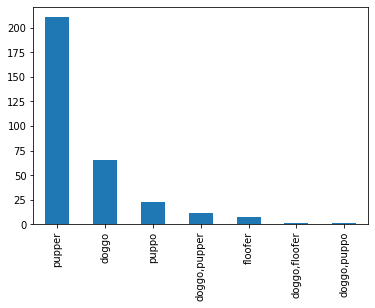

In [42]:
master_clean_df.query('dog_stage != ""').dog_stage.value_counts().plot(kind='bar')
plt.show()